In [33]:
from itertools import combinations
from operator import itemgetter
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
# customer_df = pd.read_csv('customerdata.csv',low_memory=False)
customer_df = pd.read_csv('customerdata.csv',low_memory=False, nrows = 1000)
customer_df.head()

,name,DELIVERY_DATE,CUSTOMER_ID,id,TIME_CREATED,product_item_id,PRODUCT_NAME,CATEGORY,QUANTITY,DELIVERY_QUANTITY,status,COMPLAINT_REASON,UNIT_MEASURE,code,PACKAGING,MRP,UNIT_PRICE,DISCOUNT
0,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41534,Nandini Shubham-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,22.0,22.0,0.0
1,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41540,Nandini Toned Milk-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,19.0,19.0,0.0
2,Bangalore,2021-03-07T00:00:00.000+05:30,33,23181829,2021-03-06T07:15:05.000+05:30,41569,Heritage Toned Milk-500ML Pouch,Milk,3,3,DELIVERED,NaN,500.0,ML,Pouch,21.0,21.0,0.0
3,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41531,Heritage Full Cream Milk-500ML Pouch,Milk,2,2,DELIVERED,NaN,500.0,ML,Pouch,26.0,26.0,0.0
4,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41536,Nandini Samrudhi-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,23.0,23.0,0.0


In [35]:
frequent = pd.DataFrame(customer_df.groupby('id')["product_item_id"].apply(list))
frequent

,product_item_id
id,
23181828,"[41534, 41540]"
23181829,[41569]
23181830,"[41531, 41536]"
23181831,"[41540, 41541, 41610]"
23181832,"[41534, 41610]"
...,...
23182410,[41534]
23182411,[41541]
23182412,"[41535, 41536, 41610]"


In [36]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [37]:
unique_items = to_1D(frequent["product_item_id"]).value_counts()

In [38]:
unique_items

41540    174
41534     97
41541     77
41536     63
41610     55
        ... 
74282      1
56871      1
74268      1
85527      1
74761      1
Length: 202, dtype: int64

In [39]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [40]:
frequent_bool = boolean_df(frequent["product_item_id"], unique_items.keys())

In [41]:
frequent_bool

,41540,41534,41541,41536,41610,41535,41542,43190,41569,41538,...,56885,48689,42509,48688,48687,74282,56871,74268,85527,74761
id,,,,,,,,,,,,,,,,,,,,,
23181828,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23181829,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
23181830,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23181831,True,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23181832,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23182410,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23182411,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23182412,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
frequent_int = frequent_bool.astype(int)
frequent_int.head(10)

,41540,41534,41541,41536,41610,41535,41542,43190,41569,41538,...,56885,48689,42509,48688,48687,74282,56871,74268,85527,74761
id,,,,,,,,,,,,,,,,,,,,,
23181828,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181829,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23181830,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181831,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181832,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181834,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181835,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23181836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
frequent_freq_mat = np.dot(frequent_int.T, frequent_int)

In [44]:
frequent_freq_mat

array([[174,  17,  22, ...,   0,   0,   0],
       [ 17,  97,   5, ...,   0,   0,   0],
       [ 22,   5,  77, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   1]])

In [45]:
frequent_freq = pd.DataFrame(frequent_freq_mat, columns = unique_items.keys(), index = unique_items.keys())

In [46]:
frequent_freq

,41540,41534,41541,41536,41610,41535,41542,43190,41569,41538,...,56885,48689,42509,48688,48687,74282,56871,74268,85527,74761
41540,174,17,22,6,22,7,6,4,1,2,...,0,1,1,0,1,0,0,0,0,0
41534,17,97,5,3,14,14,2,6,0,0,...,0,0,0,0,0,0,1,0,0,0
41541,22,5,77,1,8,4,2,0,0,1,...,1,0,0,0,1,0,0,0,0,0
41536,6,3,1,63,6,2,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
41610,22,14,8,6,55,3,1,1,2,3,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
56871,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
74268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
85527,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
import seaborn as sn

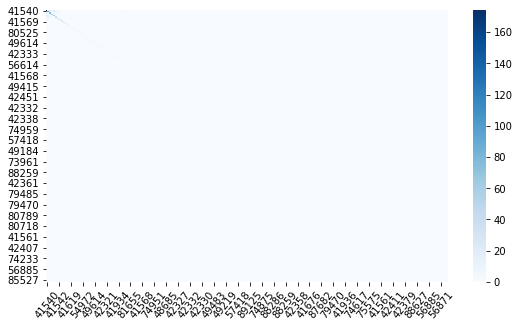

In [52]:
fig, ax = plt.subplots(figsize = (9,5))
sn.heatmap(frequent_freq, cmap = "Blues")
plt.xticks(rotation=50)
plt.savefig("heatmap.png", dpi = 300)
